In [13]:
import sys
sys.path.append('/home/peng/git/Machine_learning_for_reliability_analysis/Preprocess')
sys.path.append('/home/peng/git/Machine_learning_for_reliability_analysis/DAlgorithms')

import Preprocessdata
import MySVM as mysvc

In [14]:
from __future__ import print_function
from __future__ import division

import logging
from sklearn.datasets import make_classification
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC

from bayes_opt import BayesianOptimization
from pandas.core.frame import DataFrame
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics.classification import accuracy_score, confusion_matrix, classification_report
from scipy.interpolate import spline
from sklearn import metrics
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.gaussian_process import GaussianProcess
import timeit
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.core.pylabtools import figsize
from scipy.interpolate import spline
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
import re
from astropy.io.fits.header import Header
from matplotlib.pyplot import xlim
from sklearn import svm
%matplotlib inline


In [3]:

# Load data set and target values
start = timeit.default_timer()

####### Read the source data######################
df =pd.read_csv('Source_Data.csv', header=0)


p= Preprocessdata.standardprocess()

save_path = '/home/peng/git/Machine_learning_for_reliability_analysis/Kernel/Results/'
result_name = 'poly3_auc_10CV_80_n10_p10_21.csv'

#train, trainlabel, test, testlabel = p.scaledivd(df, 0.8)
#print (np.shape(train))

*************************************change*


In [4]:
#### scale the training dataset first and then apply the rules to test set 
train, trainlabel, test, testlabel = p.sep_scale_divd(df, 0.8)
#print (test[0:10])



In [5]:
#define the BO function
seed = 'rbf'
rad_stat = 2
def svccv(C, gamma):
    return cross_val_score(SVC(kernel = seed, C=C, gamma=gamma, random_state=rad_stat, probability=True),
                           train, trainlabel, 'roc_auc', cv=10).mean()

In [6]:
# define the boundaries for parameters
ex_range = []
for i in np.arange(-10, 11, step =1):
    ex_range.append(2**(i))
#print (ex_range)

In [6]:
# run without the exploration
svc_bayes = BayesianOptimization(svccv, {'C': (2**(-10), 2**10), 'gamma': (2**(-10), 2**10)})
svc_bayes.maximize(acq='ei')
print('Final Results')
print('SVC: %f' % svc_bayes.res['max']['max_val'])

Initialization
-----------------------------------------------------
 Step |   Time |      Value |         C |     gamma | 
    1 | 00m00s |    0.72494 |  187.4276 |  455.3037 | 
    2 | 00m00s |    0.65102 |  794.1901 |  934.7143 | 
    3 | 00m00s |    0.73143 |  601.0121 |  384.8843 | 
    4 | 00m00s |    0.73172 |  345.9879 |  323.1657 | 
    5 | 00m00s |    0.74683 |  764.9296 |  131.6355 | 
Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         C |     gamma | 
    6 | 00m01s |    0.71791 |  624.1290 |   27.5260 | 
    7 | 00m00s |    0.74209 |  988.9945 |  161.6850 | 
    8 | 00m00s |    0.74561 |  832.7080 |  196.9133 | 
    9 | 00m00s |    0.73645 |  874.4478 |   75.4935 | 
   10 | 00m00s |    0.74561 |  709.4118 |  209.1335 | 
   11 | 00m00s |    0.73274 |  906.3082 |  343.6196 | 
   12 | 00m00s |    0.74683 |   90.0388 |  131.3227 | 
   13 | 00m00s |    0.74283 |   70.2481 |  240.3231 | 
   14 | 00m00s |    0.80181 | 

In [7]:
# run the BOand get the results with exploration
svc_bayes = BayesianOptimization(svccv, {'C': (2**(-10), 2**10), 'gamma': (2**(-10), 2**10)})
svc_bayes.explore({'C': ex_range, 'gamma': ex_range})
svc_bayes.maximize(acq='ei')
print('Final Results')
print('SVC: %f' % svc_bayes.res['max']['max_val'])


Initialization
-----------------------------------------------------
 Step |   Time |      Value |         C |     gamma | 
    1 | 00m00s |    0.78965 |    0.0010 |    0.0010 | 
    2 | 00m00s |    0.79002 |    0.0020 |    0.0020 | 
    3 | 00m00s |    0.79002 |    0.0039 |    0.0039 | 
    4 | 00m00s |    0.79002 |    0.0078 |    0.0078 | 
    5 | 00m00s |    0.78651 |    0.0156 |    0.0156 | 
    6 | 00m00s |    0.78855 |    0.0312 |    0.0312 | 
    7 | 00m00s |    0.78651 |    0.0625 |    0.0625 | 
    8 | 00m00s |    0.79059 |    0.1250 |    0.1250 | 
    9 | 00m00s |    0.81378 |    0.2500 |    0.2500 | 
   10 | 00m00s |    0.80726 |    0.5000 |    0.5000 | 
   11 | 00m00s |    0.80261 |    1.0000 |    1.0000 | 
   12 | 00m00s |    0.81780 |    2.0000 |    2.0000 | 
   13 | 00m00s |    0.81944 |    4.0000 |    4.0000 | 
   14 | 00m00s |    0.83316 |    8.0000 |    8.0000 | 
   15 | 00m00s |    0.75590 |   16.0000 |   16.0000 | 
   16 | 00m00s |    0.73180 |   32.0000 |   32.0000

In [8]:
print (type(svc_bayes.res['max']['max_params']['gamma']))

<type 'numpy.float64'>


In [8]:
# get the best parameters for plotting auc on training and test
if (1): ### True use the above best parameters, false use the recored best set
    C_best = np.float(svc_bayes.res['max']['max_params']['C'])
    gamma_best= np.float(svc_bayes.res['max']['max_params']['gamma'])
    print ('use the latest records')

else:
    C_best = 2.9456
    gamma_best = 8.4192
    print ('use the historical records')


bestmodel= svm.SVC(kernel=seed, C = C_best, gamma= gamma_best, probability=True).fit(train,trainlabel)


use the latest records


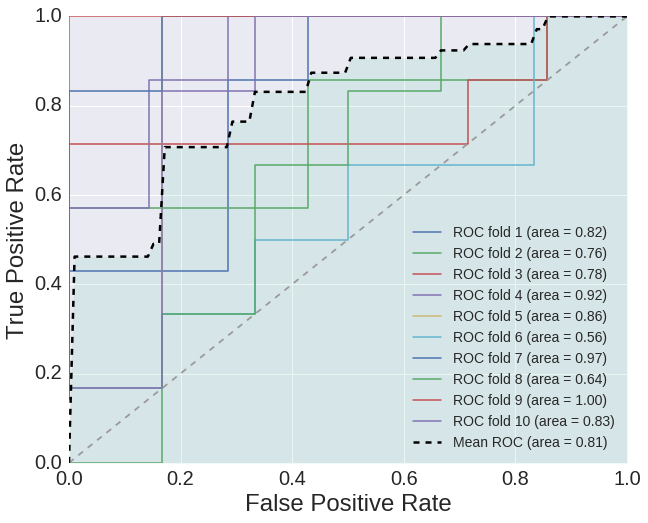

In [15]:
#use the best parameters to plot cv auc on the training set
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold
from scipy import interp

figsize(10,8)
cv = StratifiedKFold(trainlabel, n_folds=10)

bestmodel_training= svm.SVC(kernel=seed, C= C_best, gamma= gamma_best, probability=True, 
                            random_state = rad_stat)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (training, testing) in enumerate(cv):
    probas_ = bestmodel_training.fit(train[training], trainlabel[training]).predict_proba(train[testing])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(trainlabel[testing], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1.5, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', 
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2.5)

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate',fontsize = 24)
plt.ylabel('True Positive Rate',fontsize = 24)
plt.xticks(fontsize = 20) 

plt.yticks(fontsize = 20) 

#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right",fontsize = 14)

plt.fill_between(mean_fpr, 0, mean_tpr, #color="#348ABD", 
                 color="#66cdaa", alpha=0.15)
plt.show()

In [9]:
#predict the test set

tt=mysvc.test()
result = tt.test_classification(test, testlabel,bestmodel)

This is for test set**************************************
('The accuracy for the test set is 0.78125', 'and the confusion matrix is')
[[14  5]
 [ 2 11]]
             precision    recall  f1-score   support

        0.0       0.74      0.88      0.80        16
        1.0       0.85      0.69      0.76        16

avg / total       0.79      0.78      0.78        32



[[14  5]
 [ 2 11]]
*******************************************


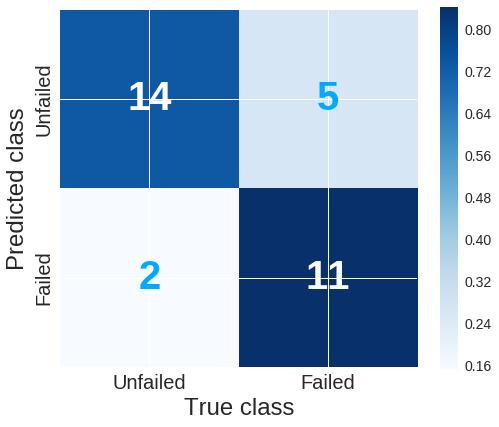

In [16]:
#plot the confusion matrix on test set
import Superplot
from sklearn.metrics.classification import accuracy_score, confusion_matrix, classification_report
print (confusion_matrix(result, testlabel))
pp = Superplot.fancy()
pp.plot_confusion_matrix(confusion_matrix(result, testlabel))

In [11]:
#plot the auc on test set
from sklearn.metrics import roc_curve, auc

y_score = bestmodel.predict_proba(test)
#print (y_score)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

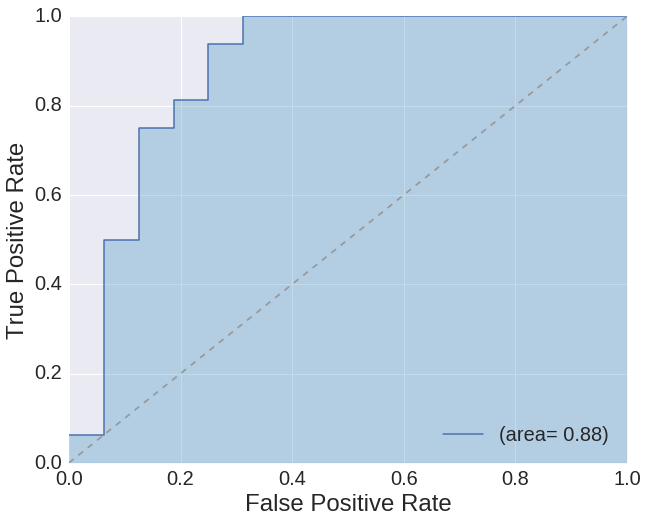

In [17]:
#plot the auc on test set
fpr, tpr, thresholds = roc_curve(testlabel, y_score[:, 1])
roc_auc = auc(fpr, tpr)

figsize(10,8)

plt.plot(fpr, tpr, lw=1.5, label='(area= %0.2f)' % ( roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
#plt.xlim([-0.05, 1.05])
#plt.ylim([-0.05, 1.05])

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate',fontsize = 24)
plt.ylabel('True Positive Rate',fontsize = 24)
plt.xticks(fontsize = 20) 

plt.yticks(fontsize = 20) 

#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right",fontsize = 20)
sec = np.arange(0.0, 1.0, 0.05)
plt.fill_between(fpr, 0, tpr, color="#348ABD", alpha=0.3)
plt.show()

In [85]:
log_name = save_path + 'log_save/' + seed + '_OB.log'
logging.basicConfig(filename=log_name,level=logging.DEBUG)
logging.info("Seed : " + seed)
logging.info("Time start : " + str(start))
#logging.info("Time end :" + str(stop))
logging.info("Parameter setting :")
logging.info("range " + str(ex_range))
logging.info("C = " + str(svc_bayes.res['max']['max_params']['C']))
logging.info("gamma = " + str(svc_bayes.res['max']['max_params']['gamma']))

In [87]:
logging.shutdown()